In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the dataset

In [4]:
df = pd.read_csv('Amazon Sale Report.csv',low_memory=False)

In [5]:
## View the first few rows

In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
# Display the shape of the DataFrame
df.shape

(128975, 24)

In [8]:
# Display the data types of each column in the DataFrame
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [9]:
# Display the names of the columns in the DataFrame
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [10]:
# Display a summary of the DataFrame, including the index, column types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [11]:
df['Date']

0         04-30-22
1         04-30-22
2         04-30-22
3         04-30-22
4         04-30-22
            ...   
128970    05-31-22
128971    05-31-22
128972    05-31-22
128973    05-31-22
128974    05-31-22
Name: Date, Length: 128975, dtype: object

In [12]:
# Convert the Date Column
#df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


In [13]:
# Access the 'Date' column from the DataFrame
df['Date']

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
128970   NaT
128971   NaT
128972   NaT
128973   NaT
128974   NaT
Name: Date, Length: 128975, dtype: datetime64[ns]

In [14]:
#Extract Month and Year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [15]:
# Print the Year and Month columns side by side
print(df[['Year', 'Month']])

        Year  Month
0        NaN    NaN
1        NaN    NaN
2        NaN    NaN
3        NaN    NaN
4        NaN    NaN
...      ...    ...
128970   NaN    NaN
128971   NaN    NaN
128972   NaN    NaN
128973   NaN    NaN
128974   NaN    NaN

[128975 rows x 2 columns]


In [16]:
#Group by Month, Category, and Currency
monthly_sales = df.groupby(['Year', 'Month', 'Category', 'currency'])['Amount'].sum().reset_index()


In [17]:
monthly_sales

,Year,Month,Category,currency,Amount


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Empty DataFrame
Columns: [Year, Month, Category, currency, Amount]
Index: []


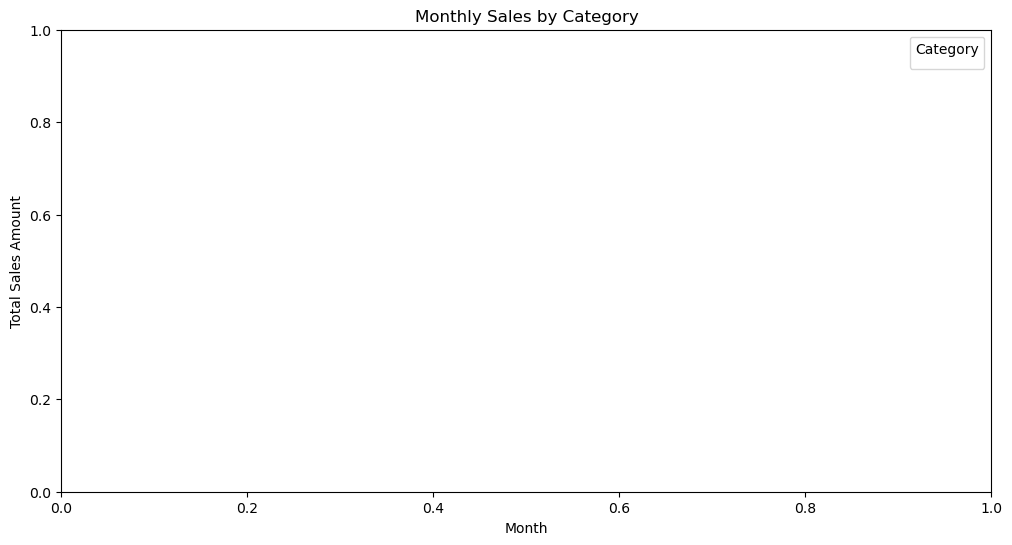

In [18]:
#Analyze the Results
print(monthly_sales)

# If you want to visualize the data, you can use matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot total sales by category and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Category', marker='o')
plt.title('Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Category')
plt.show()


In [19]:
#Assess stock levels to understand product movement

In [20]:
# Group by SKU and Category to summarize quantities sold
stock_summary = df.groupby(['SKU', 'Category'])['Qty'].sum().reset_index()

# Rename the column for clarity
stock_summary.rename(columns={'Qty': 'Total Sold'}, inplace=True)

# Display the summary
print(stock_summary)


                   SKU Category  Total Sold
0          AN201-RED-M   Bottom           2
1         AN201-RED-XL   Bottom           2
2        AN201-RED-XXL   Bottom           1
3       AN202-ORANGE-M   Bottom           2
4       AN202-ORANGE-S   Bottom           4
...                ...      ...         ...
7190    SET449-KR-NP-S      Set           1
7191   SET461-KR-NP-XL      Set           1
7192   SET461-KR-NP-XS      Set           1
7193  SET461-KR-NP-XXL      Set           1
7194    SET462-KR-NP-S      Set           1

[7195 rows x 3 columns]


In [21]:
# Count the number of unique SKUs in the 'sku' column
sku_count = df['SKU'].nunique()
print(sku_count)


7195


In [22]:
# Count the quantity of each SKU and display it
sku_quantity = df['SKU'].value_counts()
print(sku_quantity)


SKU
JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: count, Length: 7195, dtype: int64


In [23]:
# Example of initial stock (you may need to adjust based on your actual data)
initial_stock_data = {
    'SKU': ['SKU1', 'SKU2', 'SKU3'],  # example SKUs
    'Initial Stock': [100, 50, 200]    # corresponding initial stock
}
initial_stock_df = pd.DataFrame(initial_stock_data)

# Merge with stock summary to calculate remaining stock
stock_analysis = pd.merge(initial_stock_df, stock_summary, on='SKU', how='left')

# Calculate remaining stock
stock_analysis['Remaining Stock'] = stock_analysis['Initial Stock'] - stock_analysis['Total Sold'].fillna(0)

# Display the analysis
print(stock_analysis)


    SKU  Initial Stock Category  Total Sold  Remaining Stock
0  SKU1            100      NaN         NaN            100.0
1  SKU2             50      NaN         NaN             50.0
2  SKU3            200      NaN         NaN            200.0


In [24]:
# Sort by total sold to find fast-moving products
fast_moving = stock_summary.sort_values(by='Total Sold', ascending=False)

# Display top 10 fast-moving products
print(fast_moving.head(10))


                  SKU       Category  Total Sold
4548     JNE3797-KR-L  Western Dress         661
4549     JNE3797-KR-M  Western Dress         561
4550     JNE3797-KR-S  Western Dress         503
2746     JNE3405-KR-L          kurta         485
1346      J0230-SKD-M            Set         468
1347      J0230-SKD-S            Set         421
4551    JNE3797-KR-XL  Western Dress         415
2748     JNE3405-KR-S          kurta         399
4552    JNE3797-KR-XS  Western Dress         386
6305  SET268-KR-NP-XL            Set         373


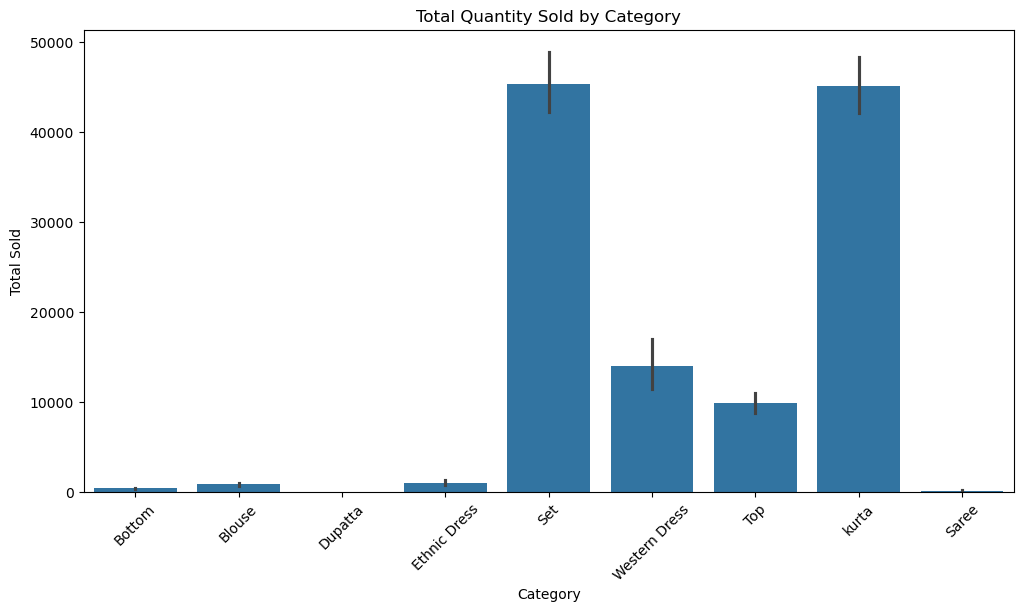

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Bar plot for total sold by category
plt.figure(figsize=(12, 6))
sns.barplot(data=stock_summary, x='Category', y='Total Sold', estimator=sum)
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Sold')
plt.xticks(rotation=45)
plt.show()


# Compare profitability using Shiprocket and INCREF data

In [26]:
df1 = pd.read_csv('Cloud Warehouse Compersion Chart.csv')

In [27]:
df1.head()

,index,Shiprocket,Unnamed: 1,INCREFF
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5


In [28]:
df1.columns

Index(['index', 'Shiprocket', 'Unnamed: 1', 'INCREFF'], dtype='object')

In [29]:
import pandas as pd

# Create DataFrames for costs
shiprocket_data = {
    'Category': ['Inbound (Fresh Stock and RTO)', 'Outbound', 'Storage Fee/Cft', 'Customer Return with Detailed QC'],
    'Shiprocket_Cost': [4.00, 7.00, 25.00, 6.00],
}

incref_data = {
    'Category': ['Inbound (Fresh Stock and RTO)', 'Outbound', 'Storage Fee/Cft', 'Customer Return with Detailed QC'],
    'INCREF_Cost': [4.00, 11.00, 0.15, 15.5],
}

shiprocket_df = pd.DataFrame(shiprocket_data)
incref_df = pd.DataFrame(incref_data)

# Display the cost DataFrames
print("Shiprocket Costs:")
print(shiprocket_df)
print("\nINCREF Costs:")
print(incref_df)

# Create DataFrame for operational details
operational_data = {
    'Task': [
        'Inward Unloading', 'Inward Validation', 'Inward QC', 'Inward GRN', 
        'Inward Putaway', 'Outward Order receipt', 'Outward Picking', 
        'Outward Packing', 'Outward Invoicing', 'Outward Shipping', 
        'Outward POD', 'Returns Inward', 'Inventory Cycle count', 
        'Inventory Audit'
    ],
    'Description': [
        'Boxes counted and weighed. Data captured in the Maven.',
        'GRN will be initiated against a valid PO document and Invoice will be captured',
        'No QC to be done (Outer Visual Inspection and Color matching)',
        'Scanning (Goods will have scannable EAN code or unique barcodes) and counting of all inventory, verification of all data by supervisor and completion of GRN. Detailed report is made available',
        'Mobile HHT based Putaway to accurately record warehouse location for every item/roll',
        'Orders will be received through integration directly into Maven or directly to Maven by the client',
        'System driven optimised picking with real-time inventory correction by marking Not Found and alternate locations suggested',
        'System driven packing by putting products into Polybags to maintain accuracy and generate pack slips',
        'Print the invoice as generated through integration or provided by the client',
        'Shipping labels and AWB via integration with vendors and generation of digital manifests to ensure accuracy',
        'Digital PODs from vendors if available via integration',
        'RTO and Customer Returns are received and Inwarded in the warehouse. Outer package visible inspection is done before inwarding',
        'Daily cycle count to maintain accuracy and deliver SLAs without disrupting regular operations. Complete Inventory to be covered in 3 months.',
        'Annual wall to wall Audit including global count driven by system to ensure speed while eliminating human error'
    ]
}

operational_df = pd.DataFrame(operational_data)

# Display the operational DataFrame
print("\nOperational Details:")
print(operational_df)


Shiprocket Costs:
                           Category  Shiprocket_Cost
0     Inbound (Fresh Stock and RTO)              4.0
1                          Outbound              7.0
2                   Storage Fee/Cft             25.0
3  Customer Return with Detailed QC              6.0

INCREF Costs:
                           Category  INCREF_Cost
0     Inbound (Fresh Stock and RTO)         4.00
1                          Outbound        11.00
2                   Storage Fee/Cft         0.15
3  Customer Return with Detailed QC        15.50

Operational Details:
                     Task                                        Description
0        Inward Unloading  Boxes counted and weighed. Data captured in th...
1       Inward Validation  GRN will be initiated against a valid PO docum...
2               Inward QC  No QC to be done (Outer Visual Inspection and ...
3              Inward GRN  Scanning (Goods will have scannable EAN code o...
4          Inward Putaway  Mobile HHT based Putawa

In [30]:


# Create DataFrames manually for demonstration (you would load this from CSV normally)
shiprocket_data = {
    'Category': ['Inbound (Fresh Stock and RTO)', 'Outbound', 'Storage Fee/Cft', 'Customer Return with Detailed QC'],
    'Shiprocket_Cost': [4.00, 7.00, 25.00, 6.00]  # Assuming costs are in a uniform currency
}

incref_data = {
    'Category': ['Inbound (Fresh Stock and RTO)', 'Outbound', 'Storage Fee/Cft', 'Customer Return with Detailed QC'],
    'INCREF_Cost': [4.00, 11.00, 0.15, 15.5]  # Convert to a uniform format if necessary
}

shiprocket_df = pd.DataFrame(shiprocket_data)
incref_df = pd.DataFrame(incref_data)

# Check the DataFrames
print(shiprocket_df)
print(incref_df)


                           Category  Shiprocket_Cost
0     Inbound (Fresh Stock and RTO)              4.0
1                          Outbound              7.0
2                   Storage Fee/Cft             25.0
3  Customer Return with Detailed QC              6.0
                           Category  INCREF_Cost
0     Inbound (Fresh Stock and RTO)         4.00
1                          Outbound        11.00
2                   Storage Fee/Cft         0.15
3  Customer Return with Detailed QC        15.50


In [31]:
# Load and Clean the Data

In [32]:
# Merge the DataFrames
comparison_df = pd.merge(shiprocket_df, incref_df, on='Category', how='outer')

# Fill NaN values with 0 for cost calculations
comparison_df.fillna(0, inplace=True)

# Display the comparison DataFrame
print(comparison_df)


                           Category  Shiprocket_Cost  INCREF_Cost
0  Customer Return with Detailed QC              6.0        15.50
1     Inbound (Fresh Stock and RTO)              4.0         4.00
2                          Outbound              7.0        11.00
3                   Storage Fee/Cft             25.0         0.15


In [33]:
#Calculate Profitability

In [34]:
# Estimate revenue for comparison
comparison_df['Shiprocket_Revenue'] = comparison_df['Shiprocket_Cost'] * 2
comparison_df['INCREF_Revenue'] = comparison_df['INCREF_Cost'] * 2

# Calculate profit
comparison_df['Shiprocket_Profit'] = comparison_df['Shiprocket_Revenue'] - comparison_df['Shiprocket_Cost']
comparison_df['INCREF_Profit'] = comparison_df['INCREF_Revenue'] - comparison_df['INCREF_Cost']

# Display the updated comparison DataFrame
print(comparison_df[['Category', 'Shiprocket_Cost', 'Shiprocket_Profit', 'INCREF_Cost', 'INCREF_Profit']])


                           Category  Shiprocket_Cost  Shiprocket_Profit  \
0  Customer Return with Detailed QC              6.0                6.0   
1     Inbound (Fresh Stock and RTO)              4.0                4.0   
2                          Outbound              7.0                7.0   
3                   Storage Fee/Cft             25.0               25.0   

   INCREF_Cost  INCREF_Profit  
0        15.50          15.50  
1         4.00           4.00  
2        11.00          11.00  
3         0.15           0.15  


In [35]:
#Analyze and Visualize

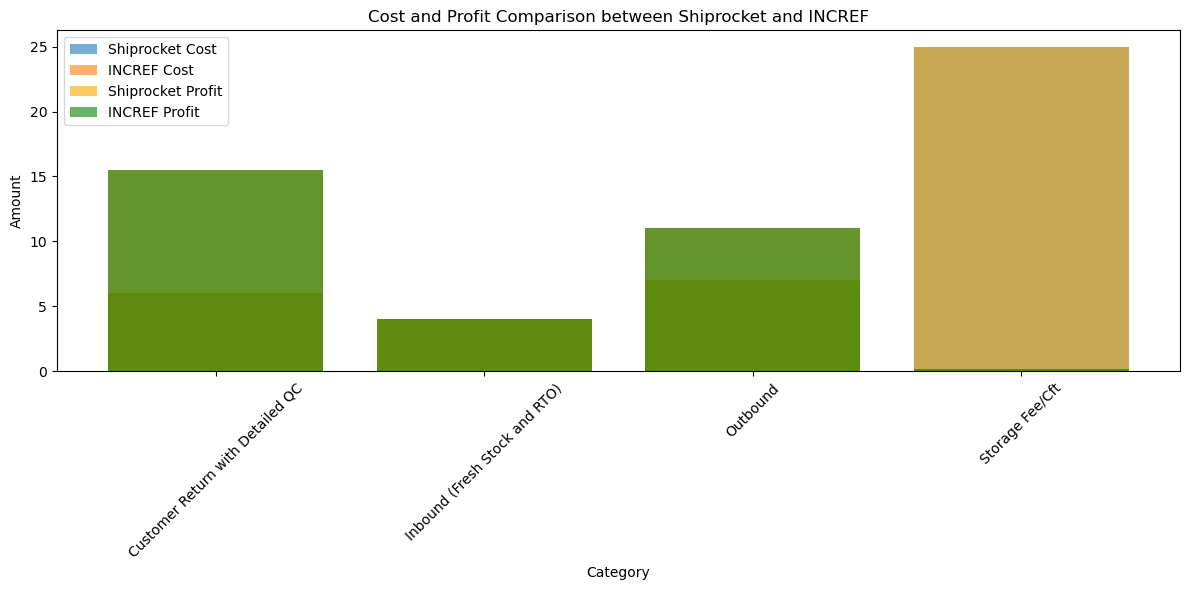

In [36]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Bar plot for costs
plt.bar(comparison_df['Category'], comparison_df['Shiprocket_Cost'], label='Shiprocket Cost', alpha=0.6)
plt.bar(comparison_df['Category'], comparison_df['INCREF_Cost'], label='INCREF Cost', alpha=0.6)

# Adding profits
plt.bar(comparison_df['Category'], comparison_df['Shiprocket_Profit'], label='Shiprocket Profit', alpha=0.6, color='orange')
plt.bar(comparison_df['Category'], comparison_df['INCREF_Profit'], label='INCREF Profit', alpha=0.6, color='green')

# Adding titles and labels
plt.title('Cost and Profit Comparison between Shiprocket and INCREF')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Compare prices across channels like Amazon, Myntra, Ajio

In [37]:
df2 = pd.read_csv('May-2022.csv')

In [38]:
df2.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [39]:
df2.columns

Index(['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP',
       'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP',
       'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP',
       'Snapdeal MRP'],
      dtype='object')

In [40]:
# Define the columns for price comparison
price_columns = ['Sku', 'Category', 'Ajio MRP', 'Amazon MRP', 'Myntra MRP']

# Select the relevant columns for comparison
price_df = df2[price_columns]

# Display the new DataFrame
print(price_df.head())


              Sku Category Ajio MRP Amazon MRP Myntra MRP
0    Os206_3141_S    Kurta     2295       2295       2295
1    Os206_3141_M    Kurta     2295       2295       2295
2    Os206_3141_L    Kurta     2295       2295       2295
3   Os206_3141_XL    Kurta     2295       2295       2295
4  Os206_3141_2XL    Kurta     2295       2295       2295


In [46]:
# Convert the 'Amazon MRP' and 'Ajio MRP' columns to numeric safely
price_df.loc[:, 'Amazon MRP'] = pd.to_numeric(price_df['Amazon MRP'], errors='coerce')
price_df.loc[:, 'Ajio MRP'] = pd.to_numeric(price_df['Ajio MRP'], errors='coerce')

# Calculate price differences
price_df.loc[:, 'Amazon vs Ajio'] = price_df['Amazon MRP'] - price_df['Ajio MRP']
print(price_df['Amazon vs Ajio'])


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1325    0.0
1326    0.0
1327    0.0
1328    0.0
1329    0.0
Name: Amazon vs Ajio, Length: 1330, dtype: float64
